In [1]:
from __future__ import print_function
import os
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

In [2]:
data_path = ['../../data']
file_path = os.sep.join(data_path + ['Human_Resources_Employee_Attrition.csv'])
data = pd.read_csv(file_path)

In [6]:
# String to Number
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for col in ['department', 'salary']:
    data[col] = lb.fit_transform(data[col])
    
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

#Type your source code
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data), columns=data.columns)

<Figure size 432x288 with 0 Axes>

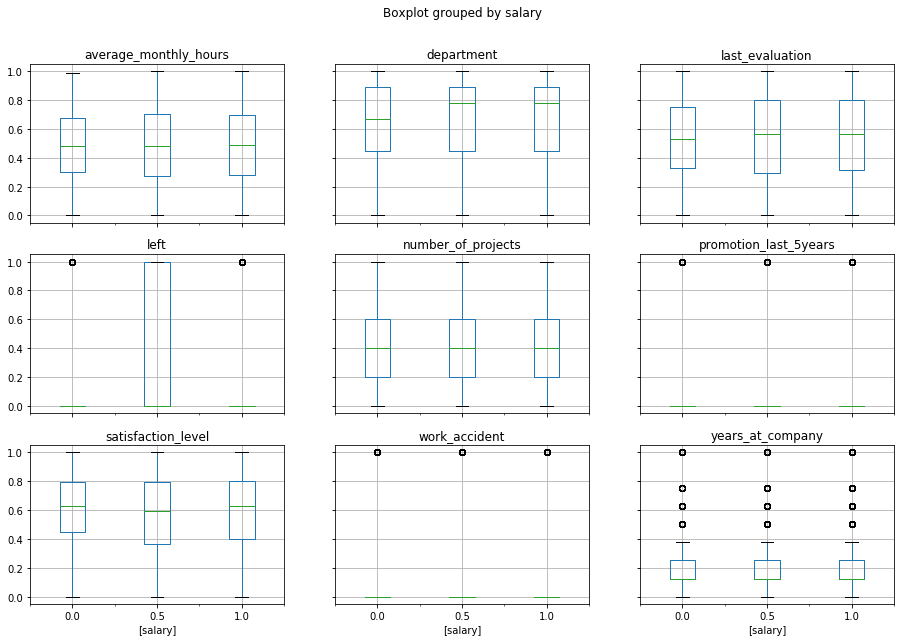

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.plotting import parallel_coordinates

plt.figure()
data.boxplot(by="salary", figsize=(15, 10))
plt.show()

C:\Users\ys\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ys\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ys\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ys\Anaconda3\lib\site-pack

<Figure size 432x288 with 0 Axes>

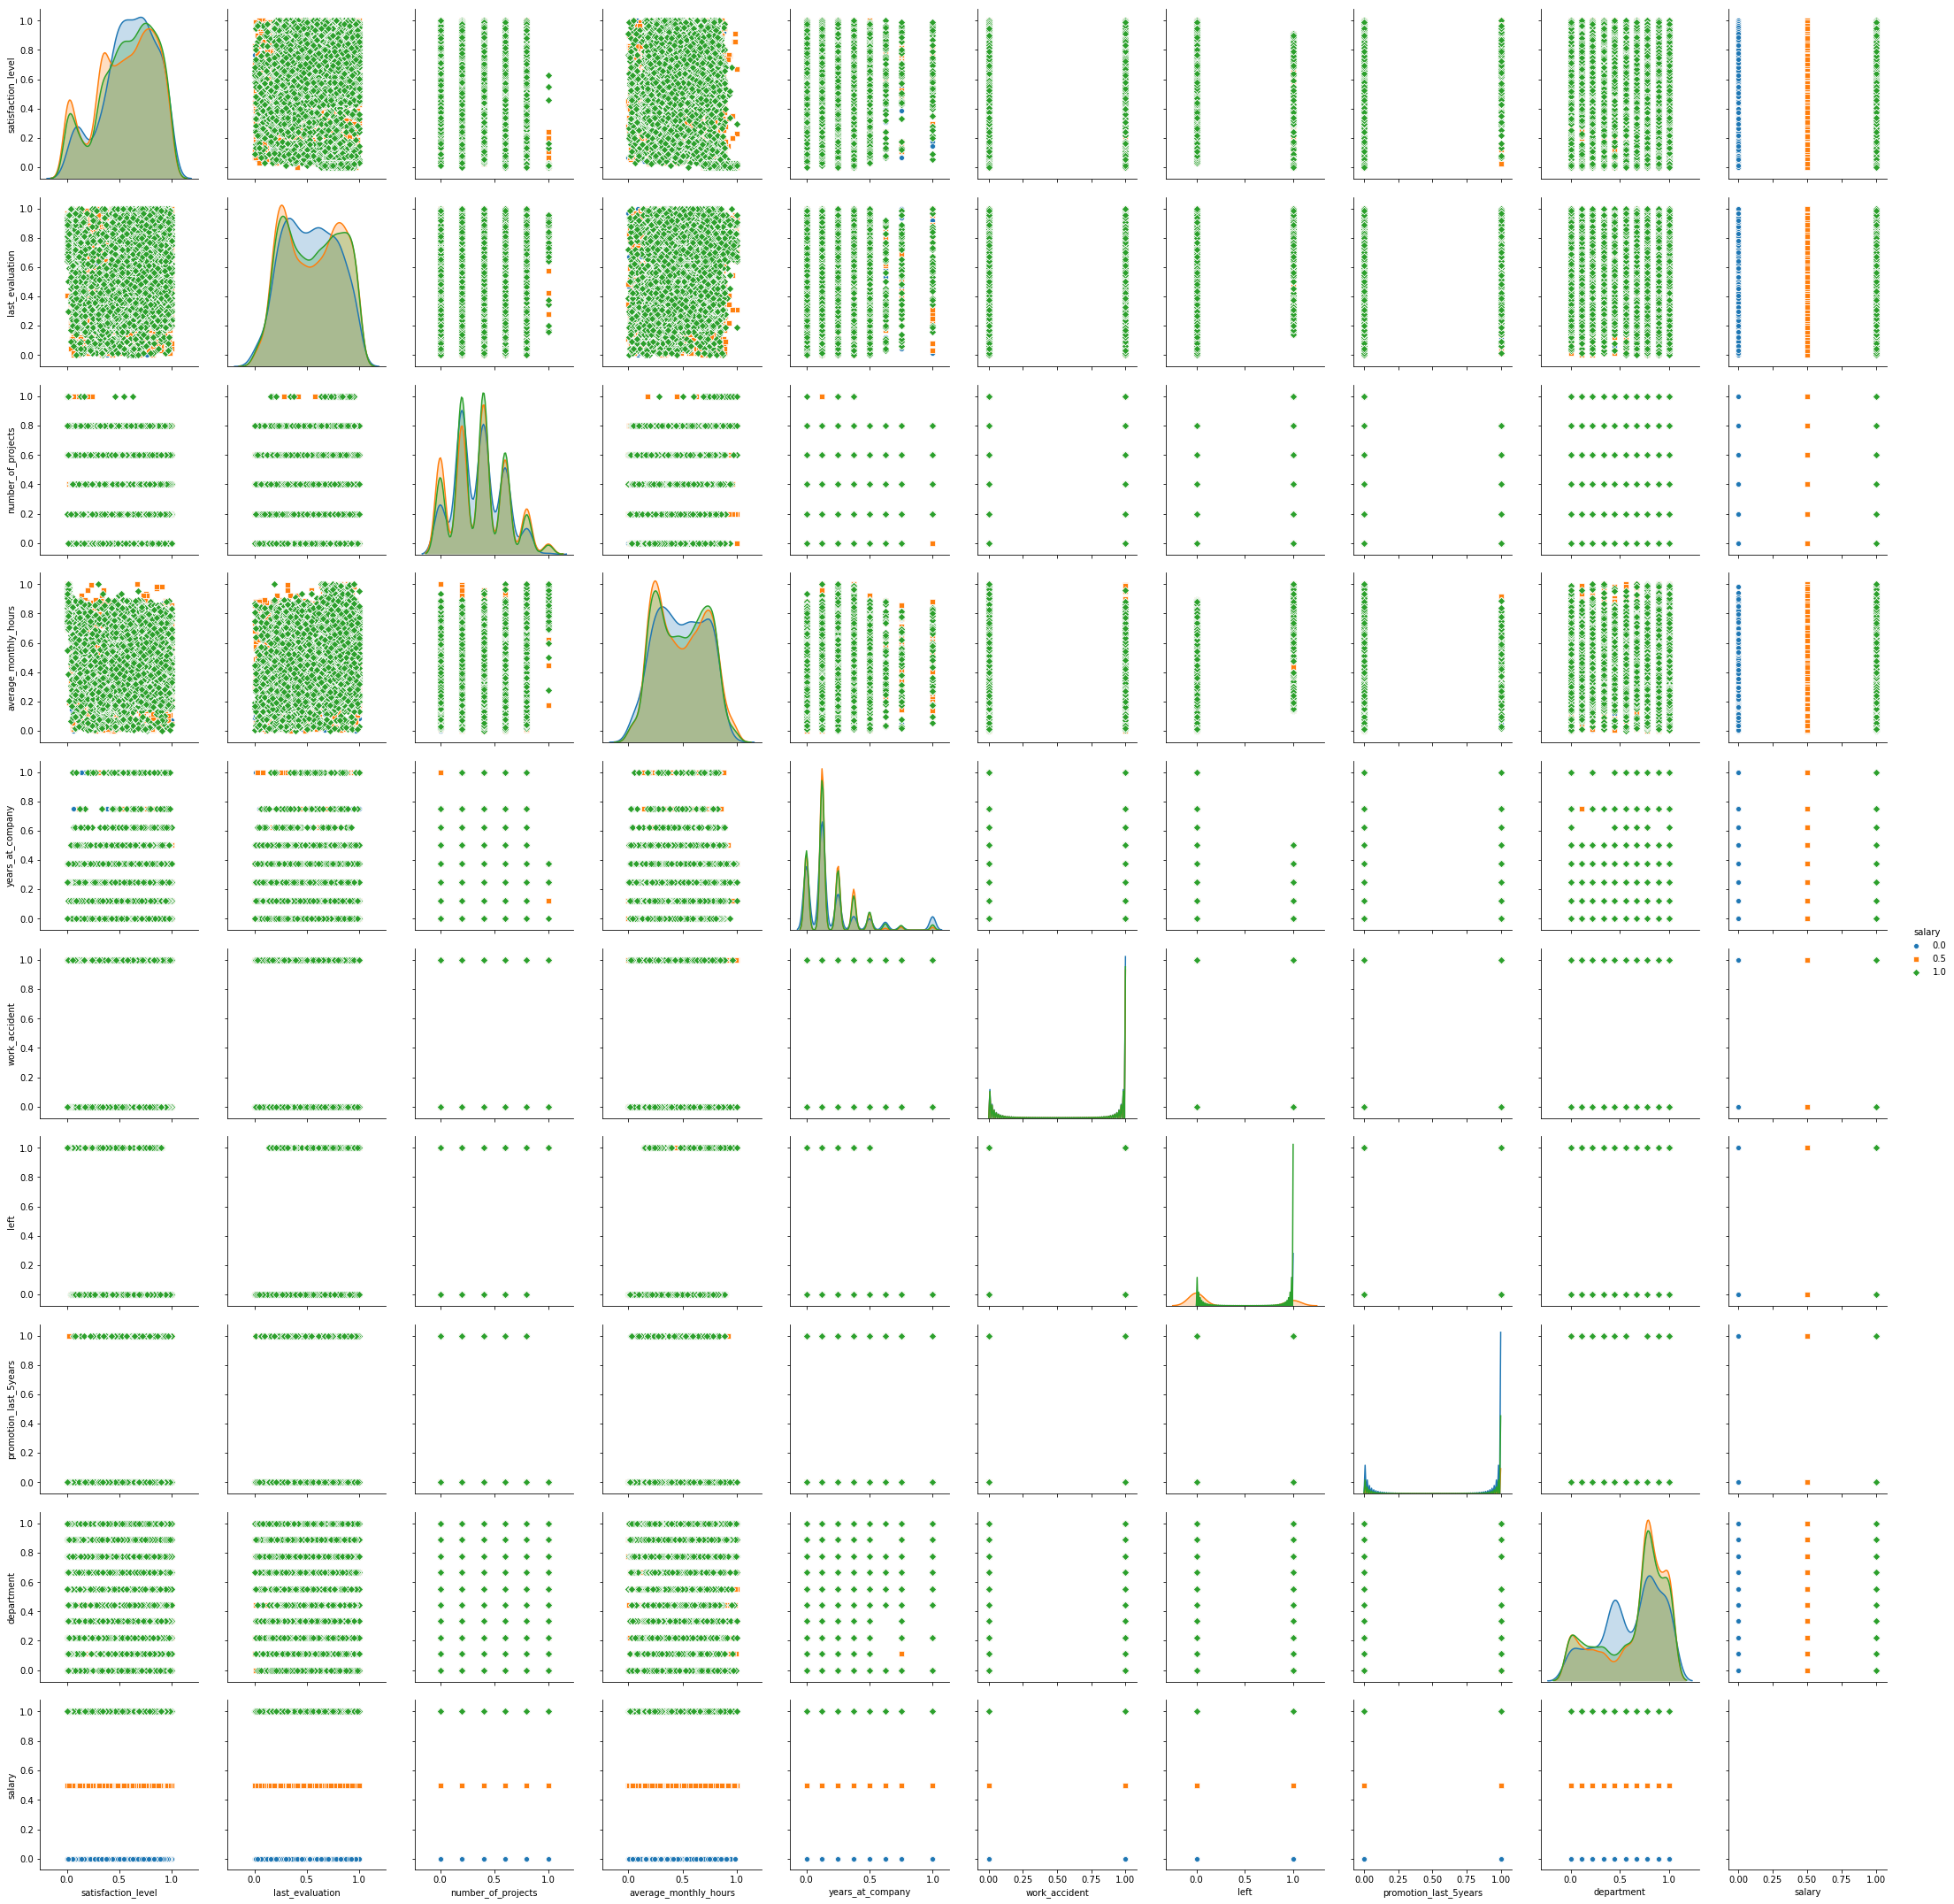

AttributeError: 'NoneType' object has no attribute 'plt'

In [8]:
plt.figure()
sns.pairplot(data, hue = "salary", size=3, markers=["o", "s", "D"])
plt.show().plt.figure()
dataset.boxplot(by="salary", figsize=(15, 10))
plt.show()

In [135]:
def accuracy(real, predict) :
    return sum(real == predict) / float(real.shape[0])

In [136]:
# Data Processing
# data.drop(['left'], axis=1, inplace=True)
# print(data.groupby('salary').mean())
X_data = data.copy()
X_data.drop(['salary'], axis=1, inplace=True)
y_data = data['salary']

# print(X_data.columns.tolist())
# print(y_data.dtypes)
print(X_data.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department'],
      dtype='object')


In [137]:
# drop
myList = []
for i in range(9) :
    myList.append(data.copy())
    
for i in range(9) :
    myList[i].drop(['salary'], axis=1, inplace=True)
    myList[i].drop([myList[i].columns[i]], axis=1, inplace=True)
#     print(myList[i].columns.tolist())

def predict(X_data, y_data) :
    x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True)

    # SVM
    LinSVC = LinearSVC()

    LinSVC = LinSVC.fit(x_train, y_train)
    y_predict = LinSVC.predict(x_test)

    print(accuracy(y_test, y_predict))
    
    # BNB
#     BNB = BernoulliNB(alpha=1.0)

#     BNB = BNB.fit(x_train, y_train)
#     y_predict = BNB.predict(x_test)

#     print(accuracy(y_test, y_predict))
    
    # DTC
#     DTC = DecisionTreeClassifier()

#     DTC = DTC.fit(x_train, y_train)
#     y_predict = DTC.predict(x_test)

#     print(accuracy(y_test, y_predict))
    
    # KNN
#     KNN = KNeighborsClassifier(n_neighbors=7)

#     KNN = KNN.fit(x_train, y_train)
#     y_predict = KNN.predict(x_test)

#     print(accuracy(y_test, y_predict))
    
for i in range(9) :
    predict(myList[i], y_data)

0.4226666666666667
0.458
0.08866666666666667
0.49766666666666665
0.49866666666666665
0.38433333333333336
0.493
0.442
0.49166666666666664


In [138]:
matrix = []
counter = 0

for i in range(36) :
    matrix.append(data.copy())
    matrix[i].drop(['salary'], axis=1, inplace=True)

    
for i in range(8) :
    for j in range(i+1, 9) :
        matrix[counter].drop([matrix[counter].columns[i]], axis=1, inplace=True)
        matrix[counter].drop([matrix[counter].columns[j-1]], axis=1, inplace=True)
        counter += 1

    
for i in range(36) :
    predict(matrix[i], y_data)

0.4856666666666667
0.4836666666666667
0.501
0.175
0.414
0.4266666666666667
0.477
0.45866666666666667
0.43866666666666665
0.5016666666666667
0.43433333333333335
0.4846666666666667
0.489
0.49633333333333335
0.44666666666666666
0.5143333333333333
0.49533333333333335
0.4683333333333333
0.4186666666666667
0.436
0.4186666666666667
0.49933333333333335
0.5006666666666667
0.497
0.49533333333333335
0.509
0.49866666666666665
0.4676666666666667
0.4856666666666667
0.43466666666666665
0.311
0.262
0.25033333333333335
0.48433333333333334
0.4786666666666667
0.41833333333333333


In [86]:
# Split as train data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True)

In [30]:
# KNN, neighbors=3
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

KNN = KNN.fit(x_train, y_train)
y_predict = KNN.predict(x_test)

print(accuracy(y_test, y_predict))

0.5083333333333333


In [31]:
# KNN, neighbors=5
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

KNN = KNN.fit(x_train, y_train)
y_predict = KNN.predict(x_test)

print(accuracy(y_test, y_predict))

0.518


In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC = DTC.fit(x_train, y_train)
y_predict = DTC.predict(x_test)

print(accuracy(y_test, y_predict))

0.607


In [33]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB(alpha=1.0)

BNB = BNB.fit(x_train, y_train)
y_predict = BNB.predict(x_test)

print(accuracy(y_test, y_predict))

0.49


In [34]:
# SVM
from sklearn.svm import LinearSVC

LinSVC = LinearSVC()

LinSVC = LinSVC.fit(x_train, y_train)
y_predict = LinSVC.predict(x_test)

print(accuracy(y_test, y_predict))

0.48133333333333334


In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR = LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)

print(accuracy(y_test, y_predict))

0.49366666666666664
